## Is it possible to predict  car rating based on its technical characteristics and user reviews?

### import data

In [ ]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
# my data frame columns
data = pd.DataFrame(columns=['car_name','car_brand','year', 'price', 'rating_count', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain','mpg' ,'Fuel_type', 'Transmission', 'Engine', 'Engine_size','Mileage','li_tags_sum'])
# the for loop will go to page by changing the index 'i', the rest is the same
for i in range(0,10):
    # Website in a variable
    website = 'https://www.cars.com/shopping/results/?page=' + str(i) + '&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=all&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip='
    data_cars = rq.get(website)
    s = BeautifulSoup(data_cars.text, "html.parser")
    # the web site is a list of ads of cars, the ads contains some of the information
    # i choose to copy to a list[] all the href of each add and get the data from the full ad. 
    links = []
    for link in s.find_all("a",{'class':'vehicle-card-link js-gallery-click-link'}):
        links.append(link.get("href"))
        # main for for data after we got the list[page i]
    for link in links:
        linkf = "https://www.cars.com" + link
        data_car = rq.get(linkf)
        soup = BeautifulSoup(data_car.text, "html.parser")
        info = soup.find_all("dl", {'class':'fancy-description-list'})

        #car_name
        car_name = soup.find('h1').get_text()
        # the ad dont have the nake of the manufactures is a different label, i was forset to make a small function that will
        # get the name from the full discripshion;) good practic to know all the companies
        car_manufacturers = ["Acura", "Alfa Romeo", "Aston Martin", "Audi", "Bentley", "BMW", "Bugatti", "Buick", "Cadillac", "Chevrolet", "Chrysler", "Citroën", "Dodge", "Ferrari", "Fiat", "Ford", "Geely", "Genesis", "GMC", "Honda", "Hyundai", "Infiniti", "Jaguar", "Jeep", "Kia", "Koenigsegg", "Lamborghini", "Land Rover", "Lexus", "Lincoln", "Lotus", "Maserati", "Mazda", "McLaren", "Mercedes-Benz", "Mini", "Mitsubishi", "Nissan", "Pagani", "Polestar", "Porsche", "Ram", "Renault", "Rolls-Royce", "Smart", "Subaru", "Suzuki", "Tesla", "Toyota", "Volkswagen", "Volvo"]
        for manufacturer in car_manufacturers:
            if str(manufacturer).lower() in car_name.lower():
                car_brand = manufacturer
                break
        else:
            car_brand = 'Other'
            # olsa about the year of poduction
        year = car_name[:4]  # Extract the first four characters from the string
        year = int(year)  # Convert the extracted string to an integer

        #price
        price = soup.find('span',{'class': 'primary-price'}).get_text()

        try:
            rating_count = (soup.find('span',{'class': 'sds-rating__count'}).get_text())
        except:
            rating_count = 'n/a'
        try:
            rating_link = (soup.find('span',{'class': 'sds-rating__link sds-button-link'}).get_text())
        except:
            rating_link = 'n/a'
       # data : Exterior_color,Interior_color,Drivetrain,mpg,Fuel_type,Transmission,Engine,Mileage,sum of featurs
        comp_info = pd.DataFrame()
        cleaned_id_text = []
        for i in info[0].find_all('dt'):
            cleaned_id_text.append(i.text)
        cleaned_id__attrb_text = []
        for i in info[0].find_all('dd'):
            cleaned_id__attrb_text.append(i.text)
        comp_info['Id'] = cleaned_id_text
        comp_info['Attribute'] = cleaned_id__attrb_text
        Exterior_color = comp_info.iloc[0,1]
        Interior_color = comp_info.iloc[1,1]
        Drivetrain = comp_info.iloc[2,1]
        mpg_text = comp_info.iloc[3, 1]
               # the mpg data was a 2 numbers (23-42), i used the evg for my data.
        match = re.search(r'\n\n(\d+)[\u2013-](\d+)', mpg_text)
        if match:
  
            new1 = int(match.group(1))
            new2 = int(match.group(2))
            mpg = (new1 + new2) / 2 
        else:
            mpg=0
        Fuel_type = comp_info.iloc[4,1]
        Transmission = comp_info.iloc[5,1]
        Engine = comp_info.iloc[6,1]
        m = re.search(r'(\d+\.\d+)L', Engine)
        if m:
           Engine_size = m.group(1)
        Mileage = comp_info.loc[comp_info['Id'] == 'Mileage', 'Attribute'].iloc[0]
        try:
              table = soup.find('ul', {'class': 'sds-list sds-list--unordered all-features-list'})
              li_tags = table.find_all('li')
              li_tags_sum=(len(li_tags))
        except:
              li_tags_sum = 'n/a'

        data.loc[len(data)] = [car_name, car_brand,year,price, rating_count, rating_link, Exterior_color, Interior_color, Drivetrain, mpg,Fuel_type, Transmission, Engine,Engine_size ,Mileage,li_tags_sum]


### save_data

In [ ]:
from datetime import datetime
filename = 'test_F' + datetime.today().strftime('%Y-%m-%d')
data.to_csv(filename, index=False)

### import data 

In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re

# Read the CSV file into a pandas DataFrame
combined_df = pd.read_csv('finall_data.csv')

In [2]:
combined_df.dtypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46136 entries, 0 to 46135
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_name        46136 non-null  object 
 1   car_brand       46136 non-null  object 
 2   year            46136 non-null  int64  
 3   price           46136 non-null  object 
 4   rating_count    44997 non-null  float64
 5   rating_link     12241 non-null  object 
 6   Exterior_color  46136 non-null  object 
 7   Interior_color  46136 non-null  object 
 8   Drivetrain      46136 non-null  object 
 9   mpg             46136 non-null  float64
 10  Fuel_type       46136 non-null  object 
 11  Transmission    46136 non-null  object 
 12  Engine          46136 non-null  object 
 13  Engine_size     46136 non-null  float64
 14  Mileage         46136 non-null  object 
 15  li_tags_sum     45296 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 5.6+ MB


In [3]:
df = combined_df.copy()
df = df.dropna(subset=['rating_count'])
df = df.dropna(subset=['rating_link'])

In [4]:
df1 = combined_df.copy()

In [5]:
df

,car_name,car_brand,year,price,rating_count,rating_link,Exterior_color,Interior_color,Drivetrain,mpg,Fuel_type,Transmission,Engine,Engine_size,Mileage,li_tags_sum
0,2020 Mercedes-Benz AMG S 63 Base 4MATIC,Mercedes-Benz,2020,"$121,900",4.6,(0 reviews),Black,Black,All-wheel Drive,21.5,Gasoline,9-Speed Automatic,4.0L V8 32V GDI DOHC Twin Turbo,4.0,"9,948 mi.",221.0
1,2019 Lexus ES 350 ES 350 Luxury,Lexus,2019,"$32,898",5.0,(79 reviews),Caviar,Chateau,Front-wheel Drive,0.0,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,3.5,"32,285 mi.",200.0
9,2019 Volkswagen Atlas 3.6L SEL,Volkswagen,2019,"$32,295",5.0,(6 reviews),Pure White,Shetland Beige,Front-wheel Drive,20.5,Gasoline,8-Speed Automatic,3.6L V6 24V GDI DOHC,3.6,"37,055 mi.",215.0
10,2013 Ford Edge Limited,Ford,2013,"$6,791",5.0,(285 reviews),Ginger Ale Metallic,Charcoal Black,All-wheel Drive,21.5,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,3.5,"257,580 mi.",205.0
11,2021 INFINITI Q50 3.0t Red Sport 400,Infiniti,2021,"$42,599",5.0,(40 reviews),Graphite Shadow,Gallery White,Rear-wheel Drive,23.0,Gasoline,7-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,3.0,"19,586 mi.",215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46114,2023 Kia Carnival LX,Kia,2023,"$45,900",5.0,(54 reviews),Snow White Pearl,Gray,Front-wheel Drive,0.0,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,3.5,128 mi.,75.0
46115,2022 Hyundai Santa Cruz 2.5T Limited,Hyundai,2022,"$38,991",3.7,(81 reviews),Ice White,Black,All-wheel Drive,0.0,Gasoline,8-Speed Automatic with Auto-Shift,2.5L I4 16V PDI DOHC Turbo,2.5,"4,196 mi.",NaN
46132,2020 Hyundai Kona SE,Hyundai,2020,"$17,960",5.0,(6 reviews),Sonic Silver,Black,Front-wheel Drive,30.0,Gasoline,6-Speed Automatic,2.0L I4 16V MPFI DOHC,2.0,"62,007 mi.",167.0
46134,2023 Kia Carnival LX,Kia,2023,"$45,900",5.0,(54 reviews),Snow White Pearl,Gray,Front-wheel Drive,0.0,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,3.5,128 mi.,75.0


### fix data

In [6]:
# Convert "price" column to string
df['price'] = df['price'].astype(str)
# Convert "price" column to numeric, remove commas and dollar signs, and set non-numeric values to NaN
df['price'] = pd.to_numeric(df['price'].str.replace(',', '').str.replace('$', ''), errors='coerce')
# Replace "Not Priced" values with NaN
df.loc[df['price'] == 'Not Priced', 'price'] = 1
# Handle missing values appropriately (e.g., impute or drop)
df = df.dropna(subset=['price'])
# Filter rows where "price" is less than or equal to 1
df = df[df['price'] > 1]


C:\Users\ליאור\AppData\Local\Temp\ipykernel_8640\1747271110.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace(',', '').str.replace('$', ''), errors='coerce')


In [7]:
#Mileage
df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').str.replace('mi.', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce').astype('Int64')

C:\Users\ליאור\AppData\Local\Temp\ipykernel_8640\2117667220.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').str.replace('mi.', '')


#### fix rating_link

In [8]:
import re

def extract_number_from_string(string):
    """
    Extracts numbers from a string and returns as integer.
    """
    regex = r'\d+'
    matches = re.findall(regex, string)
    if matches:
        return int(matches[0])
    else:
        return None


In [9]:
df['rating_link'] = df['rating_link'].astype(str).apply(lambda x: extract_number_from_string(x) if x else None)

### exploretory data analysis 

In [10]:
#Exterior_color
df['Exterior_color'] = df['Exterior_color'].astype(str)
exterior_color_dict = {color: i for i, color in enumerate(df['Exterior_color'].unique())}
df['Exterior_color'] = df['Exterior_color'].replace(exterior_color_dict)

In [11]:
#Interior_color
df['Interior_color'] = df['Interior_color'].astype(str)
Interior_color_dict = {color: i for i, color in enumerate(df['Interior_color'].unique())}
df['Interior_color'] = df['Interior_color'].replace(Interior_color_dict)

In [12]:
#Drivetrain
df['Drivetrain'] = df['Drivetrain'].astype(str)
Drivetrain_dict = {Drivetrain: i for i, Drivetrain in enumerate(df['Drivetrain'].unique())}
df['Drivetrain'] = df['Drivetrain'].replace(Drivetrain_dict)

In [13]:
#Fuel_type
df['Fuel_type'] = df['Fuel_type'].astype(str)
Fuel_type_dict = {Fuel_type: i for i, Fuel_type in enumerate(df['Fuel_type'].unique())}
df['Fuel_type'] = df['Fuel_type'].replace(Fuel_type_dict)

In [14]:
car_manufacturers = ["Acura", "Alfa Romeo", "Aston Martin", "Audi", "Bentley", "BMW", "Bugatti", "Buick", "Cadillac", "Chevrolet", "Chrysler", "Citroën", "Dodge", "Ferrari", "Fiat", "Ford", "Geely", "Genesis", "GMC", "Honda", "Hyundai", "Infiniti", "Jaguar", "Jeep", "Kia", "Koenigsegg", "Lamborghini", "Land Rover", "Lexus", "Lincoln", "Lotus", "Maserati", "Mazda", "McLaren", "Mercedes-Benz", "Mini", "Mitsubishi", "Nissan", "Pagani", "Polestar", "Porsche", "Ram", "Renault", "Rolls-Royce", "Smart", "Subaru", "Suzuki", "Tesla", "Toyota", "Volkswagen", "Volvo", "Other"]     
# create a dictionary to map car brand names to numbers
car_brand_map = {brand: i for i, brand in enumerate(car_manufacturers)}
# replace the car brand names with their corresponding numbers
df['car_brand'] = df['car_brand'].replace(car_brand_map)

In [15]:
#Transmission
df['Transmission'] = df['Transmission'].astype(str)
Transmission_dict = {Transmission: i for i, Transmission in enumerate(df['Transmission'].unique())}
df['Transmission'] = df['Transmission'].replace(Transmission_dict)

In [16]:
bins = [0, 5000, 10000, 15000, 25000, 30000,35000,45000,70000,80000,90000,100000,150000,500000,2000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df['price'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [17]:
bins = [0, 10000, 15000, 20000, 25000, 30000,35000,50000,70000,80000,90000,100000,150000,500000,2000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df['Mileage'] = pd.cut(df['Mileage'], bins=bins, labels=labels, include_lowest=True)

In [18]:
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]
df['rating_count'] = pd.cut(df['rating_count'], bins=bins, labels=labels, include_lowest=True)

In [19]:
df = df[df['rating_link'] > 10]

In [20]:
df

,car_name,car_brand,year,price,rating_count,rating_link,Exterior_color,Interior_color,Drivetrain,mpg,Fuel_type,Transmission,Engine,Engine_size,Mileage,li_tags_sum
1,2019 Lexus ES 350 ES 350 Luxury,28,2019,6,5,79,1,1,1,0.0,0,1,3.5L V6 24V PDI DOHC,3.5,6,200.0
10,2013 Ford Edge Limited,15,2013,2,5,285,3,3,0,21.5,0,2,3.5L V6 24V MPFI DOHC,3.5,13,205.0
11,2021 INFINITI Q50 3.0t Red Sport 400,21,2021,7,5,40,4,4,2,23.0,0,3,3.0L V6 24V GDI DOHC Twin Turbo,3.0,3,215.0
15,2019 Volkswagen Tiguan 2.0T SEL R-Line Black,49,2019,5,5,85,5,0,0,25.0,0,1,2.0L I4 16V GDI DOHC Turbo,2.0,3,212.0
33,2021 GMC Yukon SLT,18,2021,8,5,16,6,6,2,18.0,0,4,5.3L V8 16V GDI OHV,5.3,8,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46099,2022 Hyundai Santa Cruz 2.5T Limited,20,2022,7,4,81,249,0,0,0.0,0,13,2.5L I4 16V PDI DOHC Turbo,2.5,1,NaN
46114,2023 Kia Carnival LX,24,2023,8,5,54,356,9,1,0.0,0,1,3.5L V6 24V PDI DOHC,3.5,1,75.0
46115,2022 Hyundai Santa Cruz 2.5T Limited,20,2022,7,4,81,249,0,0,0.0,0,13,2.5L I4 16V PDI DOHC Turbo,2.5,1,NaN
46134,2023 Kia Carnival LX,24,2023,8,5,54,356,9,1,0.0,0,1,3.5L V6 24V PDI DOHC,3.5,1,75.0


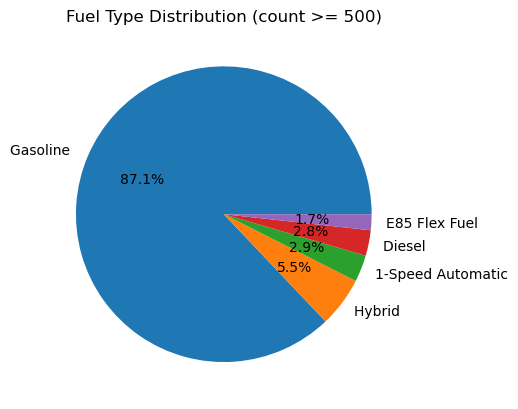

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a pie chart
feature_to_plot = 'Fuel_type'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 500
value_counts = value_counts[value_counts >= X]

# Create the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Fuel Type Distribution (count >= {})'.format(X))

# Show the plot
plt.show()


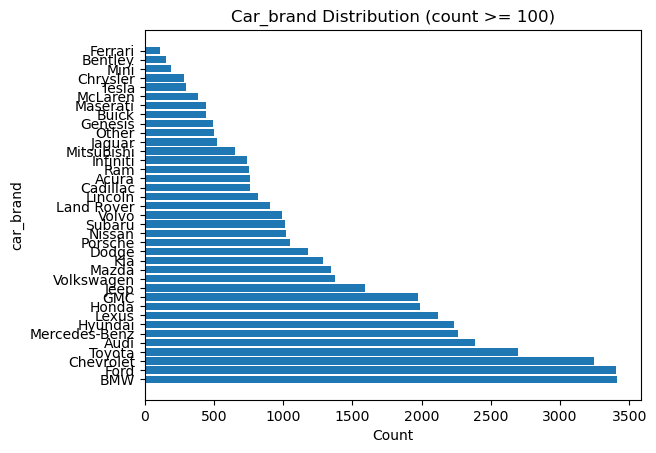

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'car_brand'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 100
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


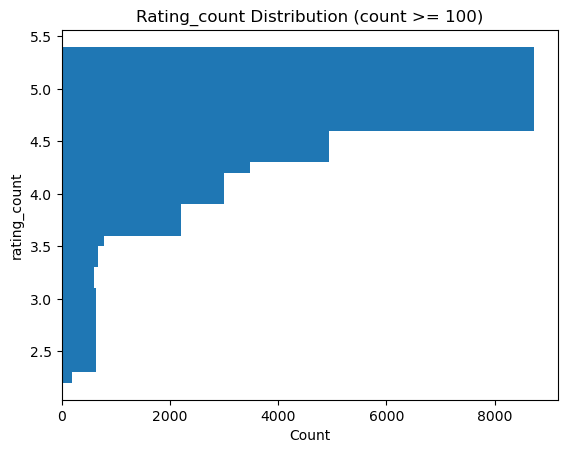

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'rating_count'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 100
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


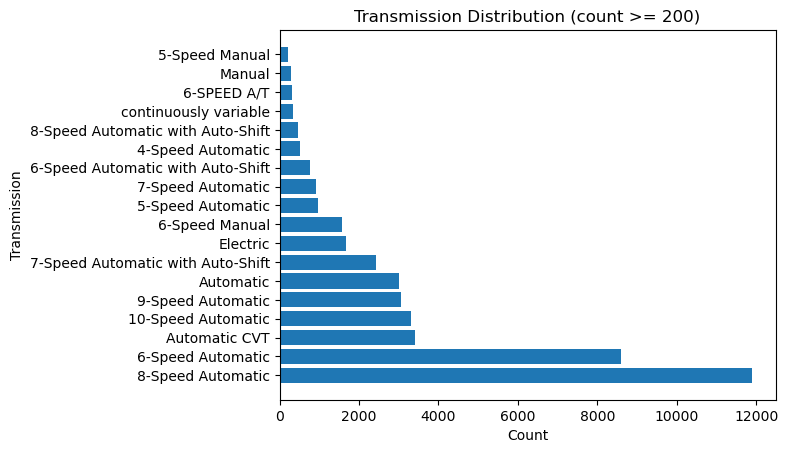

In [24]:

import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'Transmission'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 200
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)
value_counts.index
# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


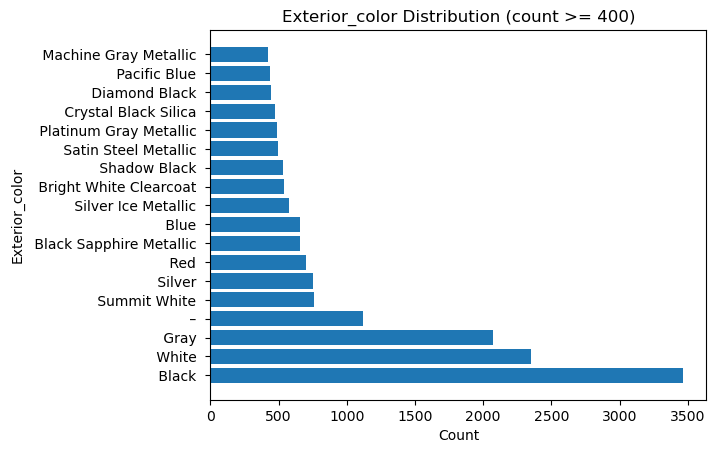

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'Exterior_color'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 400
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


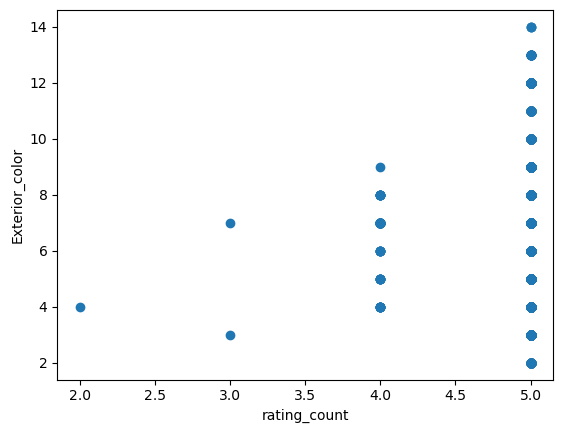

In [38]:
# Select the columns to plot
x = df["rating_count"]
y = df["price"]

# Create the plot
plt.scatter(x, y)
plt.xlabel("rating_count")
plt.ylabel("Exterior_color")
plt.show()


### EDA

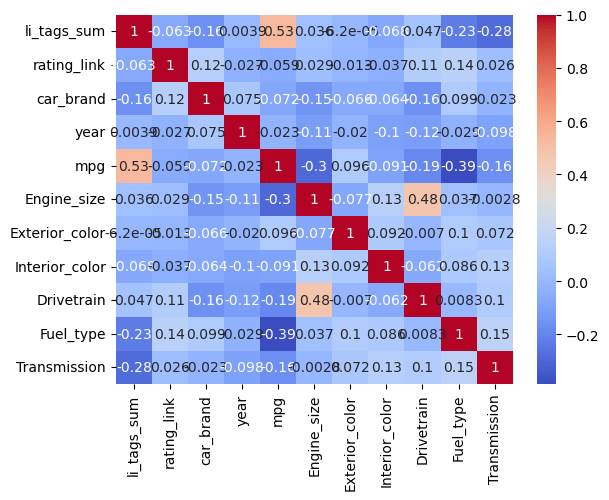

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select the three columns to show correlation
cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

corr = df[cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('heatmap.jpg', dpi=300)
plt.show()


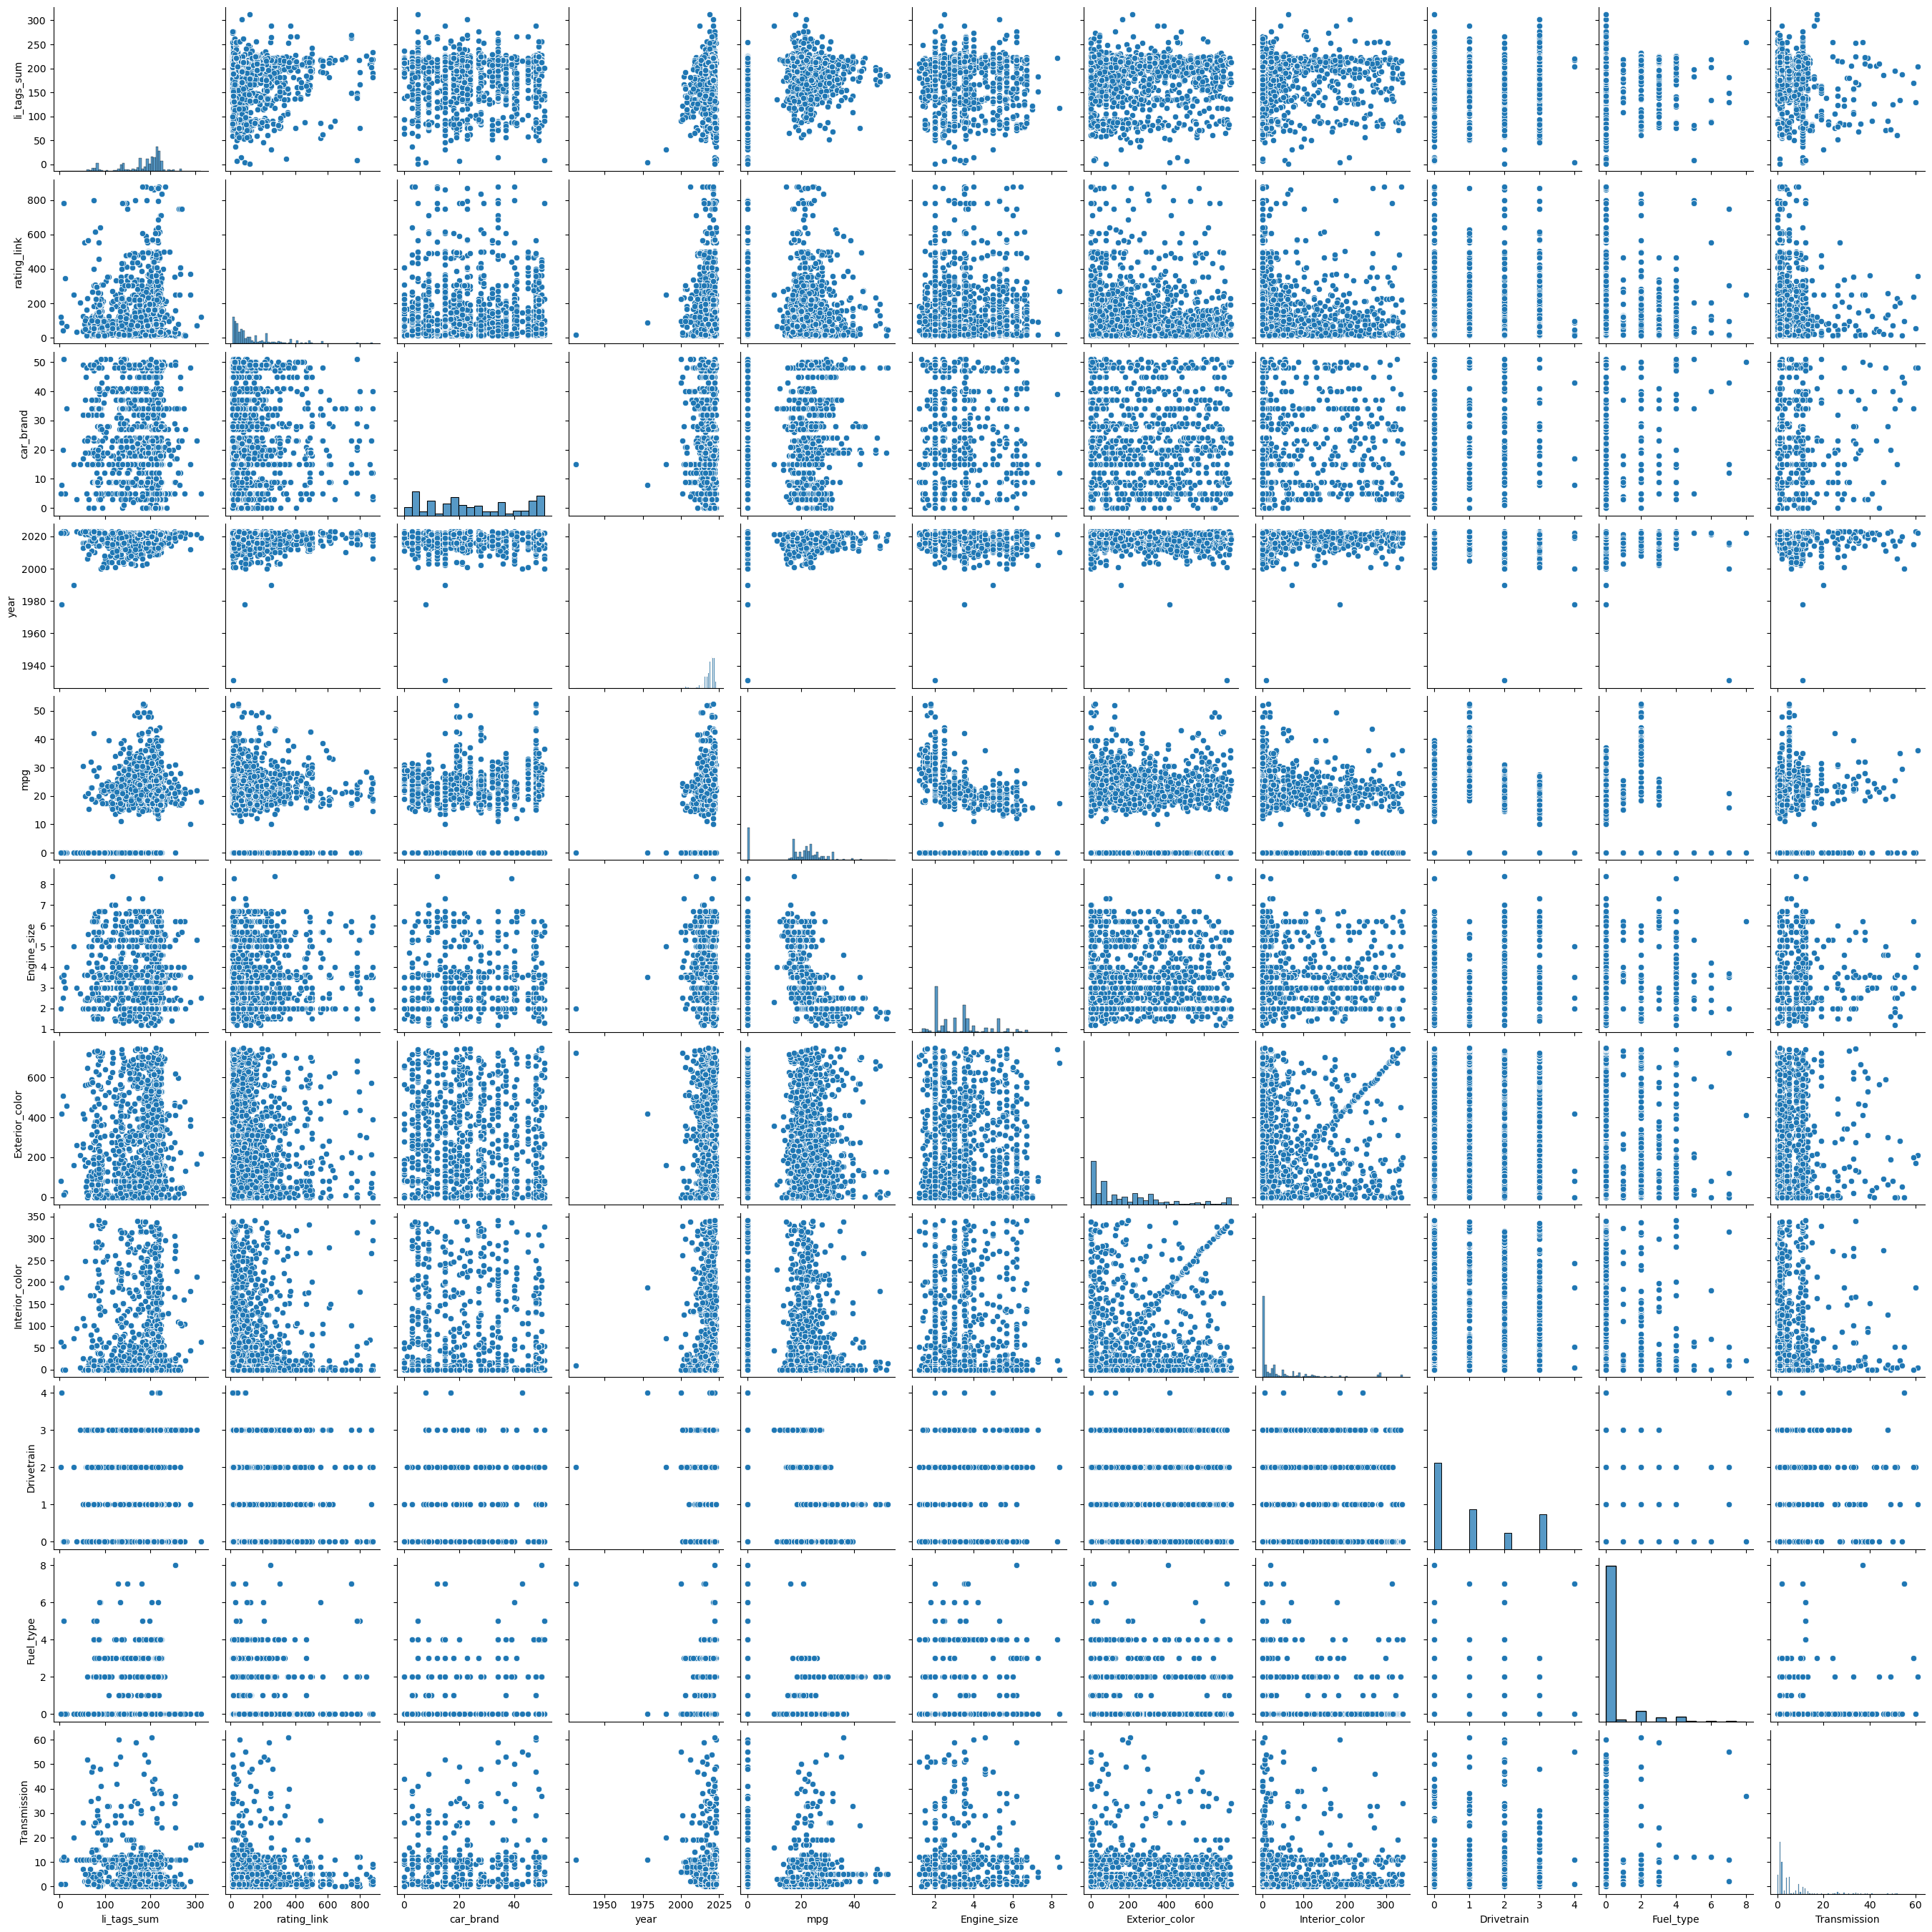

In [33]:
import pandas as pd
import seaborn as sns


features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select only the numeric columns for the scatter matrix plot
numeric_cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
numeric_df = df[numeric_cols]

# Create the scatter matrix plot using seaborn
sns.pairplot(numeric_df)

# Save the plot as a jpeg file
plt.savefig('scatter_matrix.jpg', dpi=300)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
features = ['car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select only the numeric columns for the scatter matrix plot
numeric_cols = ['rating_count','year', 'mpg', 'Engine_size', 'price', 'Mileage','car_brand','Drivetrain','Fuel_type']
numeric_df = df[numeric_cols]

# Iterate through the columns of numeric_df and create a separate scatter plot for each column
for col in numeric_df.columns:
    sns.scatterplot(x='rating_count', y=col, data=numeric_df)
    plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select the three columns to show correlation
cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Compute correlation matrix
corr = df[cols].corr()

# Heatmap of correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.savefig('heatmap.jpg', dpi=300)
plt.show()

# Scatterplot matrix
sns.pairplot(df[cols])
plt.title('Scatterplot matrix')
plt.savefig('scatterplot_matrix.jpg', dpi=300)
plt.show()

# Pairplot
sns.pairplot(df[cols], diag_kind='hist')
plt.title('Pairplot')
plt.savefig('pairplot.jpg', dpi=300)
plt.show()

# Correlation matrix plot
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation matrix plot')
plt.savefig('correlation_matrix.jpg', dpi=300)
plt.show()

# Regression plot
sns.regplot(x='price', y='Engine_size', data=df)
plt.title('Regression plot')
plt.savefig('regression_plot.jpg', dpi=300)
plt.show()

# Jointplot
sns.jointplot(x='price', y='Engine_size', data=df, kind='hex')
plt.title('Jointplot')
plt.savefig('jointplot.jpg', dpi=300)
plt.show()


### lets find the best TREE for us!

In [ ]:
import itertools
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def process_combinations(features, df, max_depth=None):
    max_r2 = 0
    for i in range(len(features)):
        combinations = itertools.combinations(features, i+1)
        for combo in combinations:
            df1 = df.copy()
            r2 = process_combination(combo, df1, max_depth=max_depth)
            if r2 > max_r2:
                max_r2 = r2
    print(f'Coefficient of determination (R^2)_MAX_IS : {max_r2:.2f}')

def process_combination(combo, df, max_depth=None):
    # select the features to use as input variables
    features = list(combo)
    
    # drop rows with missing values
    df = df.dropna()
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['rating_count'], test_size=0.5, random_state=42)
    
    # create and fit the decision tree model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # make predictions on the test set
    y_pred = model.predict(X_test)
    
    # evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Features: {features}')
    print(f'Mean squared error: {mse:.2f}')
    print(f'Coefficient of determination (R^2): {r2:.2f}')
    
    return r2


In [ ]:
features = ['car_brand','year', 'mpg','Engine_size','rating_link','price','Exterior_color','Interior_color','Drivetrain','Fuel_type','Transmission','Mileage']
df = df.dropna()
process_combinations(features,df)


### changing 
all number of reviews

 Features: ['car_brand', 'year', 'rating_link', 'price', 'Transmission', 'Mileage']
 Mean squared error: 0.01
 Coefficient of determination (R^2): 0.31

### changing 
 number of reviews >10 

Features: ['year', 'Engine_size', 'rating_link', 'Mileage']
Mean squared error: 0.00
Coefficient of determination (R^2): 0.36

In [ ]:
df